In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import joblib


In [2]:
df = pd.read_csv('lung cancer data.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
#Check the shape i.e. rows and columns in dataset
print(df.shape)

(309, 16)


In [4]:
# Check the info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Now we'll check the 5 line summary of the dataset
print(df.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

In [6]:
# We'll Now work on the EDA part of the Dataset: Checking the null values
print(df.isnull().sum())
#As you can see below there is no null value is present in the dataset

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
# Now I want to check the different values from each columns 
def unique_vals_of_cols(cols):
    for col in cols:
        print(f"{col} : {df[col].unique()}", end = "\n\n")

In [8]:
unique_vals_of_cols(df.columns)

GENDER : ['M' 'F']

AGE : [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]

SMOKING : [1 2]

YELLOW_FINGERS : [2 1]

ANXIETY : [2 1]

PEER_PRESSURE : [1 2]

CHRONIC DISEASE : [1 2]

FATIGUE  : [2 1]

ALLERGY  : [1 2]

WHEEZING : [2 1]

ALCOHOL CONSUMING : [2 1]

COUGHING : [2 1]

SHORTNESS OF BREATH : [2 1]

SWALLOWING DIFFICULTY : [2 1]

CHEST PAIN : [2 1]

LUNG_CANCER : ['YES' 'NO']



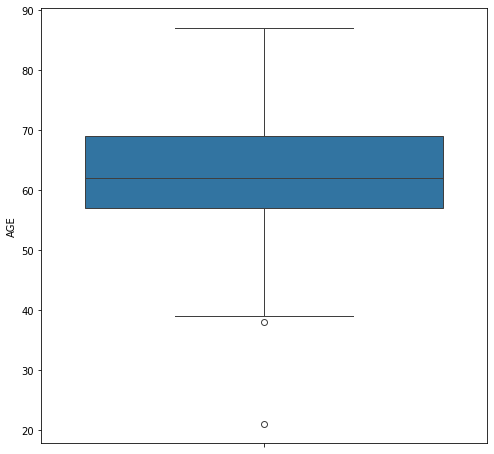

In [9]:
# After this we'll detect the outliers from the AGE column as the other columns has binary values
plt.figure(figsize=(8,8))
sns.boxplot(data= df["AGE"])
plt.xticks(rotation = 90)
plt.show()
#As you can see below diagram there are outliers in the AGE column so we'll remove it

In [10]:
#We'll Use the IQR Method to remove the Outliers
Q1 = df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [11]:
cleaned_df = df[(df["AGE"] >= lower_bound) & (df["AGE"] <= upper_bound)]

In [12]:
#Now we'll check the shape of cleaned Dataset
print(cleaned_df.shape)

(307, 16)


In [13]:
# Now we'll do the Encoding of the Data
catg_cols = cleaned_df.select_dtypes(include= "object")
catg_cols.head()

,GENDER,LUNG_CANCER
0,M,YES
1,M,YES
2,F,NO
3,M,NO
4,F,NO


In [14]:
le = LabelEncoder()

In [15]:
for col in catg_cols:
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_15588\1172649854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_15588\1172649854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])


In [16]:
cleaned_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


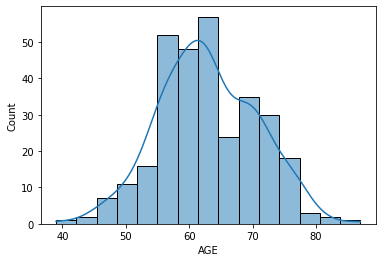

In [17]:
#We'll check the distribution of AGE column
sns.histplot(data = cleaned_df["AGE"], kde= True)
plt.show()
# As you see below diagram, we are able to see Bell curv in the Data distribution. So Data is Normally distributed.

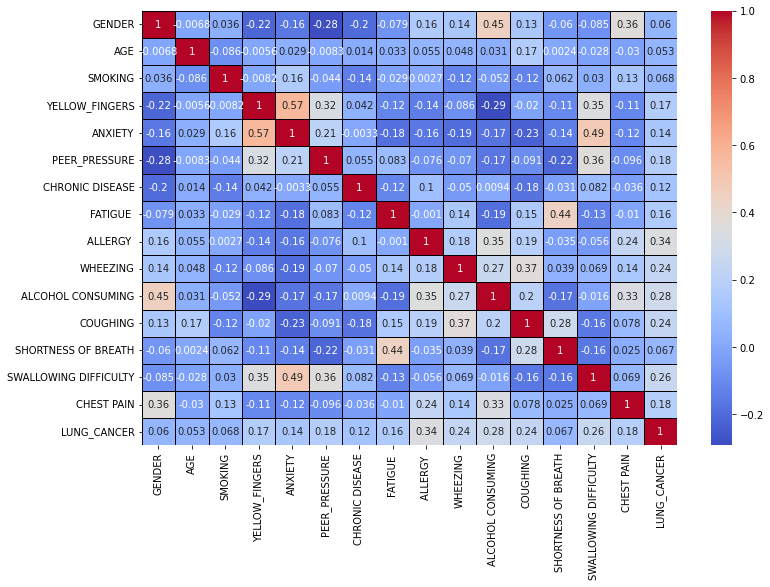

In [18]:
# Now we'll check the Correlation of the data to Lung Cancer
plt.figure(figsize=(12,8))
sns.heatmap(data= cleaned_df.corr(), annot= True, cmap= "coolwarm", linewidths=0.5, linecolor="black")
plt.show()
# In the below Diagram as the Colour is towards brown then it has Positive Relation with Target
# If the colour is towards blue then it has Negative Relation with Target

In [19]:
# We'll Divide the  data in x and y
x = cleaned_df.drop(columns= "LUNG_CANCER")
y = cleaned_df['LUNG_CANCER']

In [20]:
#We can see that Multicollinearity in between columns. For the Medical problems it should be below 15%.
#As we can see above in some columns it is more than threshold 
# FOr this we'll use PCA
pca = PCA(n_components= 4)  # this is trial and err method, use n_comp value such as the total above 90% Info should be
                            # Captured from the data 

In [21]:
x_comp = pca.fit_transform(x)

In [22]:
x_com = pd.DataFrame(x_comp, columns=["PC1","PC2","PC3","PC4"])

In [23]:
# We'll chck the how much Info is captured if it is above 90% then we'll continue or increase the n_compo
print(np.cumsum(pca.explained_variance_ratio_))
# Below we can see above 90% Info is captured with 4 n_components

[0.94617889 0.95736115 0.96465955 0.97033059]


In [24]:
x_com.corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,-2.148396e-15,6.184975e-16,3.306792e-15
PC2,-2.148396e-15,1.000000e+00,-1.507063e-15,-9.217141e-16
PC3,6.184975e-16,-1.507063e-15,1.000000e+00,5.841170e-16
PC4,3.306792e-15,-9.217141e-16,5.841170e-16,1.000000e+00


In [25]:
#As you can see Above correlation is dropped in between columns
# We'll split the data training and testing
x_train, x_test, y_train, y_test = train_test_split(x_com, y, test_size= 0.3, random_state=45)

In [26]:
rf_model = RandomForestClassifier(n_estimators= 9,random_state= 55)

In [27]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=55)

In [28]:
y_pred = rf_model.predict(x_test)

In [29]:
print(f"Accuracy is : {accuracy_score(y_test, y_pred)}")

Accuracy is : 0.9247311827956989


In [30]:
print(f"F1 Score is : {f1_score(y_test, y_pred)}")

F1 Score is : 0.9585798816568047


In [31]:
print(f"Recall Score is : {recall_score(y_test, y_pred)}")

Recall Score is : 0.9642857142857143


In [32]:
print(f"Precision Score is : {precision_score(y_test, y_pred)}")

Precision Score is : 0.9529411764705882


In [36]:
# Save the model to a file
joblib.dump(rf_model, 'lung_cancer_model.pkl')

['lung_cancer_model.pkl']